In [2]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms.community import girvan_newman
from itertools import islice


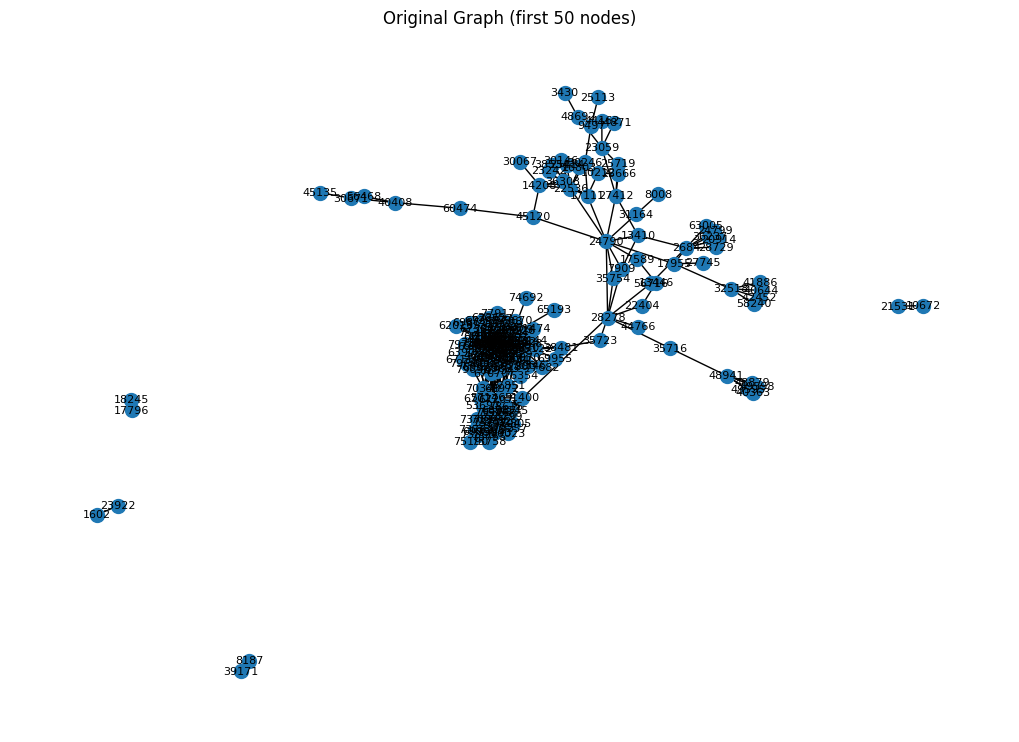

In [4]:
edges_df = pd.read_csv('edges_sampled_3K.csv')
edges_df.columns = ['source', 'target']

G = nx.Graph()
G.add_edges_from(edges_df.values)

def draw_graph(G, title="Graph Visualization", nodes_to_draw=200):
    plt.figure(figsize=(10, 7))
    subgraph = G.subgraph(list(G.nodes)[:nodes_to_draw])
    nx.draw(subgraph, with_labels=True, node_size=100, font_size=8)
    plt.title(title)
    plt.show()

draw_graph(G, title="Original Graph (first 50 nodes)")


In [5]:
def run_girvan_newman(G, num_communities=3):
    comp_generator = girvan_newman(G)
    limited = list(islice(comp_generator, num_communities - 1))[-1]
    return [list(c) for c in limited]

# Run the algorithm to get 3 communities
communities = run_girvan_newman(G.copy(), num_communities=3)

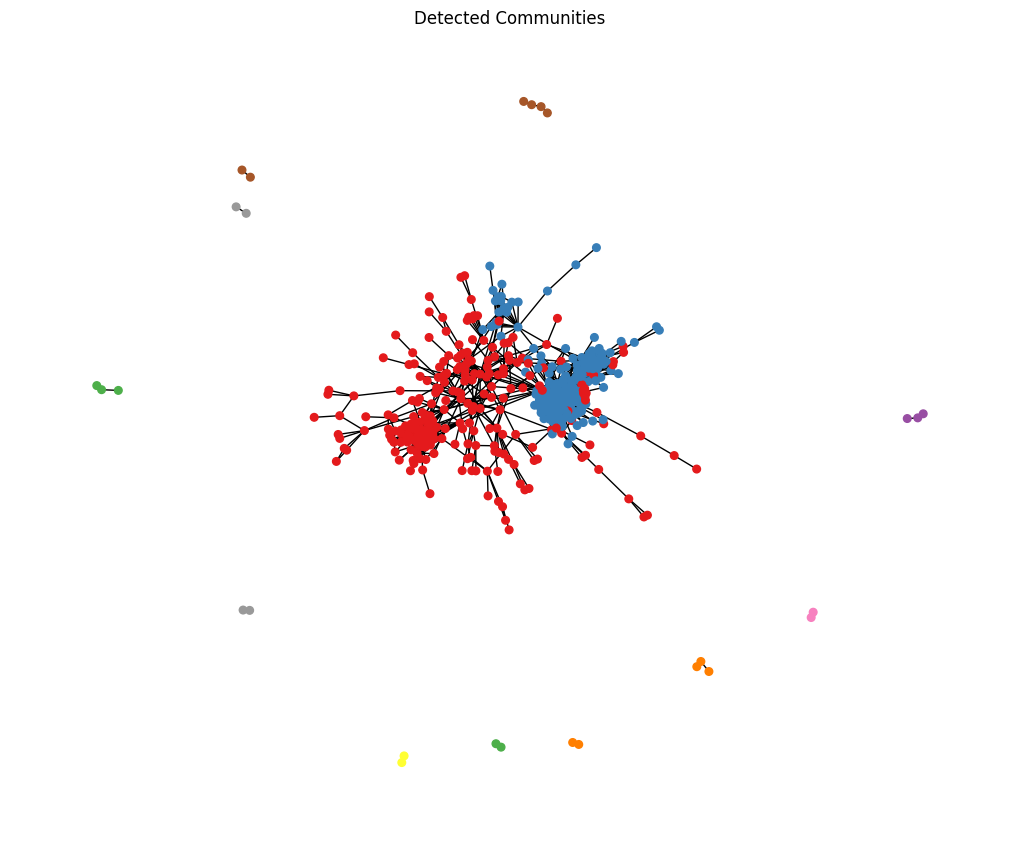

In [6]:
def draw_communities(G, communities):
    color_map = {}
    for i, community in enumerate(communities):
        for node in community:
            color_map[node] = i

    node_colors = [color_map.get(node, 0) for node in G.nodes()]
    plt.figure(figsize=(10, 8))
    nx.draw(G, node_color=node_colors, with_labels=False, node_size=30, cmap=plt.cm.Set1)
    plt.title("Detected Communities")
    plt.show()

draw_communities(G, communities)

In [9]:
try:
    ground_truth_df = pd.read_csv('community_membership_3K.csv')
    ground_truth_df.columns = ['node_id', 'community_id']
    print("\nSample from ground-truth labels:")
    print(ground_truth_df.head())
except FileNotFoundError:
    print("\n⚠️ Ground-truth file 'community_members.csv' not found — skipping evaluation.")



Sample from ground-truth labels:
   node_id  community_id
0        1             0
1        2             0
2        3             1
3        4             1
4        5             2


In [ ]:
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score

def evaluate_communities(predicted_communities, ground_truth_df):
    node_to_pred = {}
    for cluster_id, community in enumerate(predicted_communities):
        for node in community:
            node_to_pred[str(node)] = cluster_id

    ground_truth_df = ground_truth_df.astype(str)
    ground_truth_df = ground_truth_df[ground_truth_df['node_id'].isin(node_to_pred)]

    y_true = ground_truth_df['community_id'].astype(int).values
    y_pred = [node_to_pred[node] for node in ground_truth_df['node_id']]

    ari = adjusted_rand_score(y_true, y_pred)
    nmi = normalized_mutual_info_score(y_true, y_pred)

    print(f"\n🔍 Community Detection Evaluation:")
    print(f"Adjusted Rand Index (ARI): {ari:.4f}")
    print(f"Normalized Mutual Info (NMI): {nmi:.4f}")
    return ari, nmi

if 'ground_truth_df' in locals():
    evaluate_communities(communities, ground_truth_df)



🔍 Community Detection Evaluation:
Adjusted Rand Index (ARI): 1.0000
Normalized Mutual Info (NMI): 1.0000
